In [8]:
import requests
import pandas as pd
import json
import datetime as dt
#import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
#requesting data for the price of rice in EU member states
riceprice=requests.get("https://www.ec.europa.eu/agrifood/api/rice/prices?")

In [28]:
#Raw Data cleaning
df_riceprice_rawdata=pd.DataFrame(riceprice.json())
#display(df_riceprice)
#Data filtering 
df_riceprice=df_riceprice_rawdata.copy()
df_riceprice["price"]=df_riceprice["price"].str.replace("€","") # removing the € character in price column
df_riceprice["price"]=pd.to_numeric(df_riceprice["price"])   # changing price data into numeric data type
display(df_riceprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   memberStateCode  19176 non-null  object 
 1   memberStateName  19176 non-null  object 
 2   beginDate        19176 non-null  object 
 3   endDate          19176 non-null  object 
 4   weekNumber       19176 non-null  int64  
 5   price            19176 non-null  float64
 6   unit             19176 non-null  object 
 7   marketingYear    19176 non-null  object 
 8   stage            19176 non-null  object 
 9   type             19176 non-null  object 
 10  variety          19176 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


None

In [30]:
# formating the beginDate and endDate into Datetime data type
display(df_riceprice.head(5))
#df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True, infer_datetime_format=True)
#print(df_riceprice.info())


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
0,IT,Italy,2016-11-07,17/07/2016,46,750.0,Tonne,2015/2016,Milled non parboiled,Japonica,Augusto
1,IT,Italy,2017-02-01,08/01/2017,19,680.0,Tonne,2016/2017,Milled non parboiled,Japonica,Augusto
2,IT,Italy,2017-02-20,26/02/2017,26,680.0,Tonne,2016/2017,Milled non parboiled,Japonica,Augusto
3,IT,Italy,2017-01-30,05/02/2017,23,680.0,Tonne,2016/2017,Milled non parboiled,Japonica,Augusto
4,IT,Italy,2017-01-23,29/01/2017,22,680.0,Tonne,2016/2017,Milled non parboiled,Japonica,Augusto


In [31]:
# Filtering by Year from RAW data
series_byyear=df_riceprice_rawdata.beginDate.str.extract(r"[/](\d{4})") #Series data for each year
#print(type(df_data_byyear))
df_ricebyyear=pd.concat([df_riceprice, series_byyear], axis=1)
df_ricebyyear.rename(columns={0:"Year"}, inplace=True) #Renaming column as Year
df_ricebyyear.set_index("Year", inplace=True) #Sorting index by year
df_ricebyyear.sort_index(inplace=True)
display(df_ricebyyear.sort_values("memberStateName"))
#display(df_ricebyyear.index)

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
Year,,,,,,,,,,,
2014,BG,Bulgaria,2014-10-27,02/11/2014,9,416.20,Tonne,2014/2015,Milled,Japonica,Average
2015,BG,Bulgaria,2015-09-14,20/09/2015,3,150.32,Tonne,2015/2016,Paddy,Japonica,Average
2015,BG,Bulgaria,2015-04-05,10/05/2015,36,141.12,Tonne,2014/2015,Paddy,Japonica,Average
2015,BG,Bulgaria,2015-07-12,13/12/2015,15,294.00,Tonne,2015/2016,Paddy,Japonica,Not informed
2015,BG,Bulgaria,2015-05-25,31/05/2015,39,151.60,Tonne,2014/2015,Broken,Japonica,Average
...,...,...,...,...,...,...,...,...,...,...,...
2016,ES,Spain,2016-11-21,27/11/2016,13,295.93,Tonne,2016/2017,Paddy,Japonica,Average
2016,ES,Spain,2016-05-12,11/12/2016,15,300.89,Tonne,2016/2017,Paddy,Japonica,Average
2002,ES,Spain,2002-12-30,05/01/2003,18,490.00,Tonne,2002/2003,Milled,Japonica,Average


In [32]:
#Filtering data for rice price in each country 
print(df_ricebyyear.memberStateName.unique())
df_Italy=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Italy'")
Italy=df_Italy.groupby(["Year"]).mean().rename(columns={"price":"Italy"})
df_Greece=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Greece'")
Greece=df_Greece.groupby(["Year"]).mean().rename(columns={"price":"Greece"})
df_Spain=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Spain'")
Spain=df_Spain.groupby(["Year"]).mean().rename(columns={"price":"Spain"})
df_Portugal=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Portugal'")
Portugal=df_Portugal.groupby(["Year"]).mean().rename(columns={"price":"Portugal"})
df_Bulgaria=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Bulgaria'")
Bulgaria=df_Bulgaria.groupby(["Year"]).mean().rename(columns={"price":"Bulgaria"})
df_France=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='France'")
France=df_France.groupby(["Year"]).mean().rename(columns={"price":"France"})
df_Germany=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Germany'")
Germany=df_Germany.groupby(["Year"]).mean().rename(columns={"price":"Germany"})
df_Romania=df_ricebyyear.groupby(["Year"]).mean().rename(columns={"price":"Romania"})
Romania=df_Romania.groupby(["Year"]).mean().rename(columns={"price":"Romania"})


['Spain' 'Italy' 'Greece' 'Portugal' 'Romania' 'Bulgaria' 'France'
 'Germany']


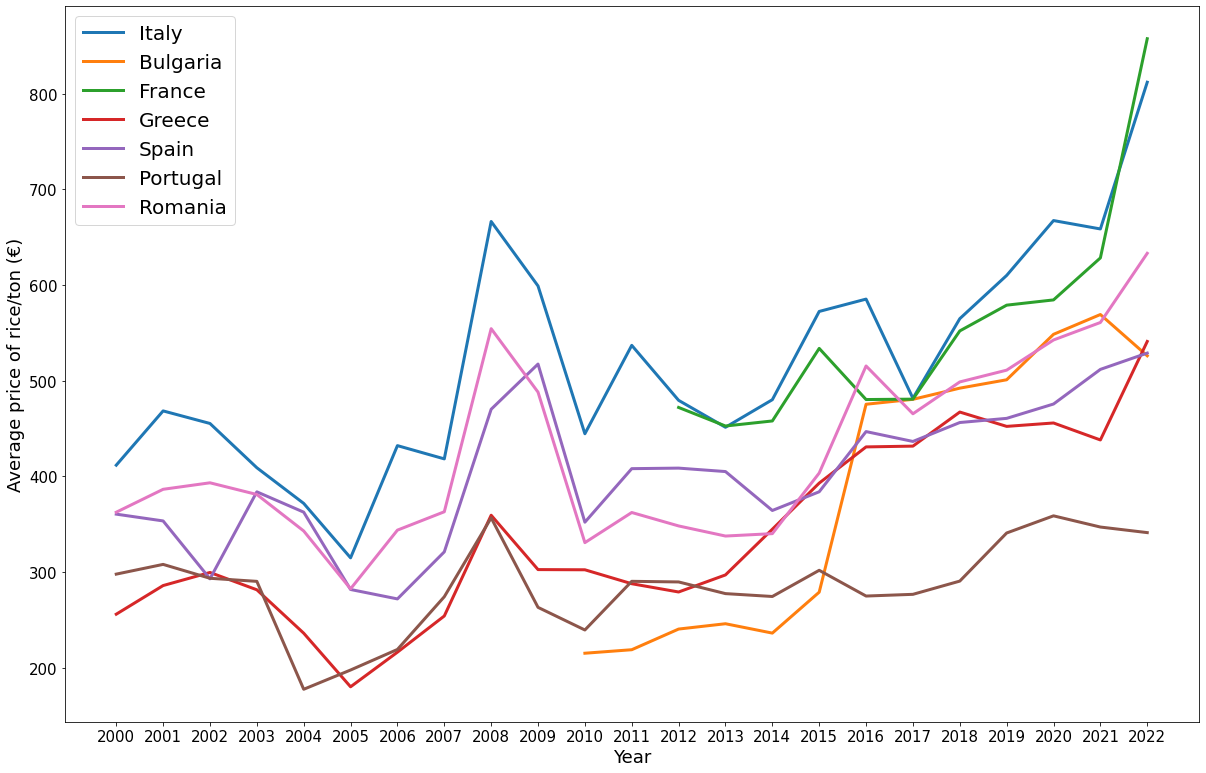

In [39]:
fig, ax = plt.subplots(figsize=(17, 11))
ax.plot(Italy.index, Italy["Italy"], label="Italy", linewidth=3)

ax.plot(Bulgaria.index, Bulgaria["Bulgaria"], label="Bulgaria", linewidth=3)

ax.plot(France.index, France["France"], label="France", linewidth=3)

ax.plot(Greece.index, Greece["Greece"], label="Greece", linewidth=3)

ax.plot(Spain.index, Spain["Spain"], label="Spain", linewidth=3)

ax.plot(Portugal.index, Portugal["Portugal"], label="Portugal", linewidth=3)

ax.plot(Romania.index, Romania["Romania"], label="Romania", linewidth=3)

#ax.plot(Germany.index, Germany["Germany"], label="Germany", linewidth=3)
#ax.plot(year, Bulgaria, label="Bulgaria")
ax.legend(fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel("Year", fontsize=18)
plt.ylabel("Average price of rice/ton (€)", fontsize=18)
plt.tight_layout()
plt.show()